In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.18.0'

In [5]:
model = keras.models.load_model('model_2024_hairstyle.keras')

In [8]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model_2024_hairstyle.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\alexe\AppData\Local\Temp\tmppchxgjlh\assets


INFO:tensorflow:Assets written to: C:\Users\alexe\AppData\Local\Temp\tmppchxgjlh\assets


Saved artifact at 'C:\Users\alexe\AppData\Local\Temp\tmppchxgjlh'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2513009548496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2513009549840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2513009550032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2513009549456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2513009552144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2513009552720: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [9]:
!ls -lh model_2024_hairstyle.tflite

-rw-r--r-- 1 alexey 197121 77M Dec  2 15:28 model_2024_hairstyle.tflite


In [10]:
import tensorflow.lite as tflite

In [11]:
interpreter = tflite.Interpreter(model_path='model_2024_hairstyle.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [12]:
output_index

13

In [13]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

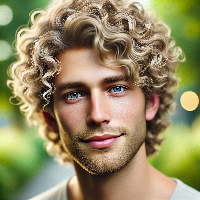

In [24]:
img = download_image('https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg')
img = prepare_image(img, target_size=(200, 200))
img

In [25]:
import numpy as np

In [26]:
def prepare_input(x):
    return x / 255.0

In [27]:
x = np.array(img, dtype='float32')
X = np.array([x])
X = prepare_input(X)

In [28]:
X[0, 0, 0, 0]

0.23921569

In [29]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()

preds = interpreter.get_tensor(output_index)

In [30]:
preds

array([[0.8937741]], dtype=float32)

Question 5

```
$ docker images agrigorev/zoomcamp-bees-wasps:v2
REPOSITORY                      TAG       IMAGE ID       CREATED         SIZE
agrigorev/zoomcamp-bees-wasps   v2        b9f6c13de368   2 minutes ago   662MB
```

Question 6

```
docker build -t model-2024-hairstyle . 
docker run -it --rm -p 8080:8080 model-2024-hairstyle 

python test.py
```